# Análisis de sentimientos

### Integrantes:


*   Alan Ignacio López Carrillo
*   Mauricio Escorza Cantú
*   Abraham Jimenez Reyes
*   Juan Daniel San Martín Macías



El análisis de sentimientos es una técnica de procesamiento de lenguaje natural utilizada  para identificar y extraer información subjetiva de un texto.

El crecimiento de las redes sociales ha aumentado el interés en el análisis de sentimientos. Con la abundancia de críticas, calificaciones y expresiones, la opinión virtual se ha vuelto valiosa para las empresas, utilizándola para comercializar productos, descubrir oportunidades y gestionar su reputación.

### Hipótesis
Se puede determinar automáticamente el sentimiento asociado a un mensaje en redes sociales mediante el análisis de texto.

### Objetivo
Comparar el rendimiento de distintos clasificadores al momento de categorizar tweets en tristeza, alegría, amor, enojo, miedo y sorpresa.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# Importar los datos
train_data = pd.read_csv('/content/gdrive/My Drive/Reconocimiento de Patrones y Aprendizaje Automatizado/Proyecto/training.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/Reconocimiento de Patrones y Aprendizaje Automatizado/Proyecto/test.csv')
validation_data = pd.read_csv('/content/gdrive/My Drive/Reconocimiento de Patrones y Aprendizaje Automatizado/Proyecto/validation.csv')

Mounted at /content/gdrive


In [ ]:
# Agregar la descripción asociada a la etiqueta en el data set
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train_data['description'] = train_data['label'].map(labels_dict)
train_data.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
# Calcular la frecuencia relativa de cada categoría
train_data['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

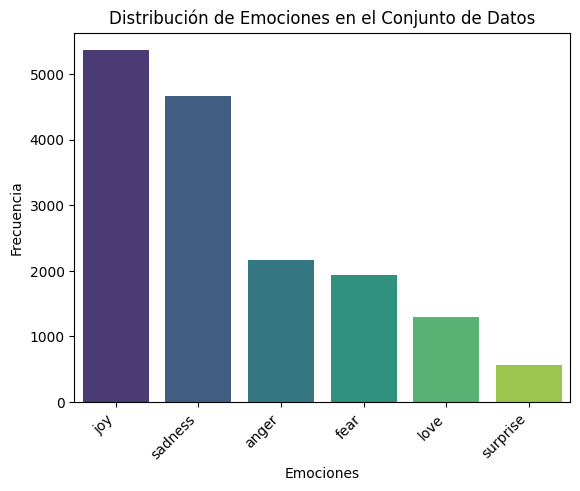

In [ ]:
# Crear el gráfico de distribución
sns.countplot(data=train_data, x='description', order=train_data['description'].value_counts().index, palette='viridis')

# Ajustar el formato del gráfico
plt.xticks(rotation=45, ha='right')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.title('Distribución de Emociones en el Conjunto de Datos')

# Mostrar el gráfico
plt.show()

# SVM

La implementacion de este algoritmo es muy sencilla utilizando la librería sklearn ya introducida anteriormente. Con la orden SVC(kernel=“linear”), construimos un clasificador SVM con kernel lineal.

Accuracy en conjunto de prueba: 0.8855
Accuracy en conjunto de validación: 0.8890

Reporte de Clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       581
           1       0.88      0.95      0.91       695
           2       0.82      0.67      0.74       159
           3       0.89      0.88      0.88       275
           4       0.85      0.85      0.85       224
           5       0.76      0.56      0.64        66

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000


Reporte de Clasificación en conjunto de validación:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       550
           1       0.89      0.94      0.91       704
           2       0.88      0.75      0.81       178
           3       0.91      0.87      0.89       275
  

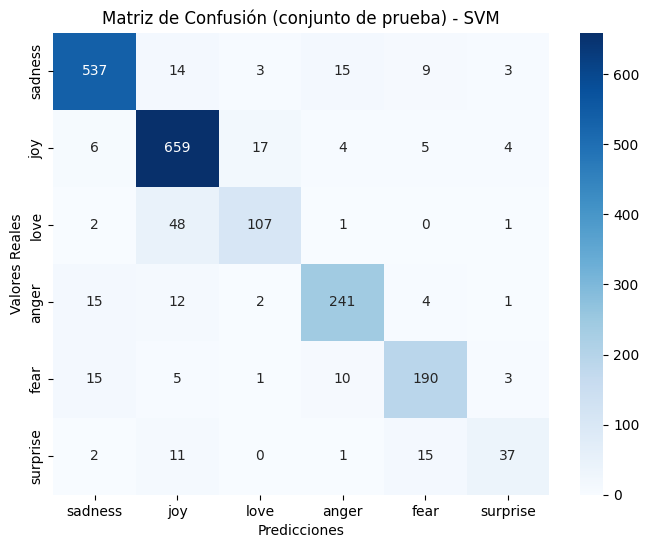

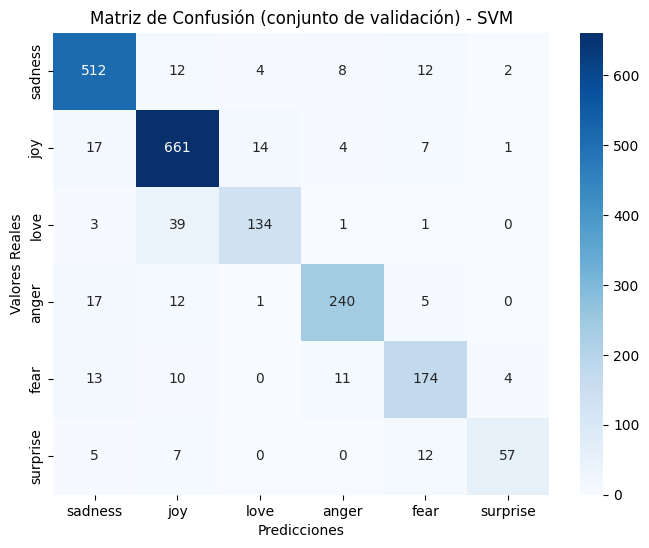

In [ ]:
"""
Separar características (X) y etiquetas (y)
Las etiquetas (x) contienen los textos
Las etiquetas (y) contienen las etiquetas de sentimientos
"""
X_train = train_data['text']
y_train = train_data['label']

X_test = test_data['text']
y_test = test_data['label']

X_validation = validation_data['text']
y_validation = validation_data['label']

# Convertir texto a vectores TF-IDF
"""
- Utilizamos TfidVectorizer de scikit-learn, esto asigna un peso
  a cada palabra en funcion de su importancia en la oracion.
- Utilizamos fit_tranform para ajustar el vectorizador al conjunto
  de entrenamiento y asi transformar los textos en vectores.
"""
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
X_validation_vectors = vectorizer.transform(X_validation)

# Inicializar y entrenar el modelo SVM
"""
Inicializamos el modelo con un Kernel lineal
Entrenamos el modelo utilizando los vectores TF-IDF de entrenamiento
"""
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectors, y_train)

# Hacer predicciones
y_pred_test = svm_model.predict(X_test_vectors)
y_pred_validation = svm_model.predict(X_validation_vectors)

# Evaluar el rendimiento
"""
Por ultimo calculamos la precisión (accuracy) en los conjuntos
de prueba y validación. Además, imprimimos un informe de clasificación que
incluye métricas como precisión, recall y F1-score para una evaluación más
detallada del rendimiento del modelo. Estas métricas proporcionan información
sobre cómo el modelo clasifica las diferentes clases.
"""
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_validation = accuracy_score(y_validation, y_pred_validation)

print(f'Accuracy en conjunto de prueba: {accuracy_test:.4f}')
print(f'Accuracy en conjunto de validación: {accuracy_validation:.4f}')

# Otras métricas de evaluación
print('\nReporte de Clasificación en conjunto de prueba:')
print(classification_report(y_test, y_pred_test))

print('\nReporte de Clasificación en conjunto de validación:')
print(classification_report(y_validation, y_pred_validation))

# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Obtener la matriz de confusión para el conjunto de validación
conf_matrix_validation = confusion_matrix(y_validation, y_pred_validation)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (conjunto de prueba) - SVM')
plt.show()

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (conjunto de validación) - SVM')
plt.show()

# # Imprimir las matrices de confusión
# print('\nMatriz de Confusión en conjunto de prueba:')
# print(conf_matrix_test)

# print('\nMatriz de Confusión en conjunto de validación:')
# print(conf_matrix_validation)


# Naive Bayes

In [ ]:
# Construir los conjuntos de entrenamiento y prueba
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [ ]:
# Vectorizar texto usando CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Inicializar y entrenar el clasificador Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Realizar predicciones
nb_predictions = nb_model.predict(X_test_vectorized)

# Evaluar el modelo
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.7655

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       581
           1       0.74      0.97      0.84       695
           2       0.95      0.23      0.37       159
           3       0.92      0.57      0.70       275
           4       0.82      0.53      0.64       224
           5       0.00      0.00      0.00        66

    accuracy                           0.77      2000
   macro avg       0.69      0.54      0.56      2000
weighted avg       0.77      0.77      0.73      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


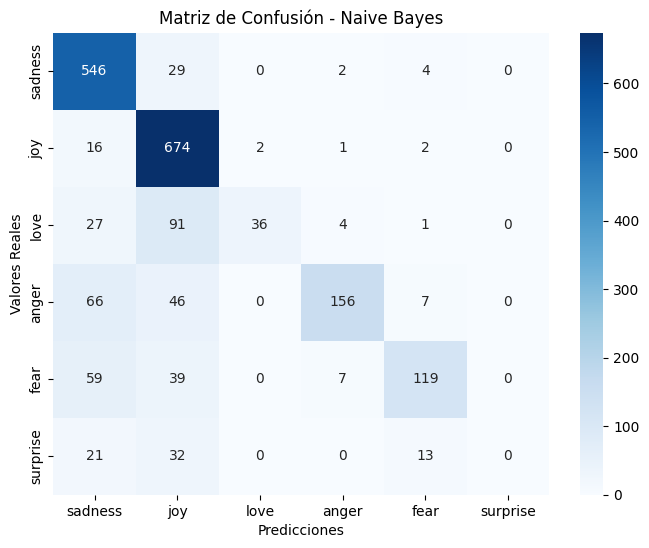

In [ ]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# Random Forest

Random Forest Accuracy: 0.8625

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       581
           1       0.83      0.94      0.88       695
           2       0.81      0.61      0.70       159
           3       0.91      0.83      0.87       275
           4       0.84      0.84      0.84       224
           5       0.67      0.55      0.60        66

    accuracy                           0.86      2000
   macro avg       0.83      0.78      0.80      2000
weighted avg       0.86      0.86      0.86      2000



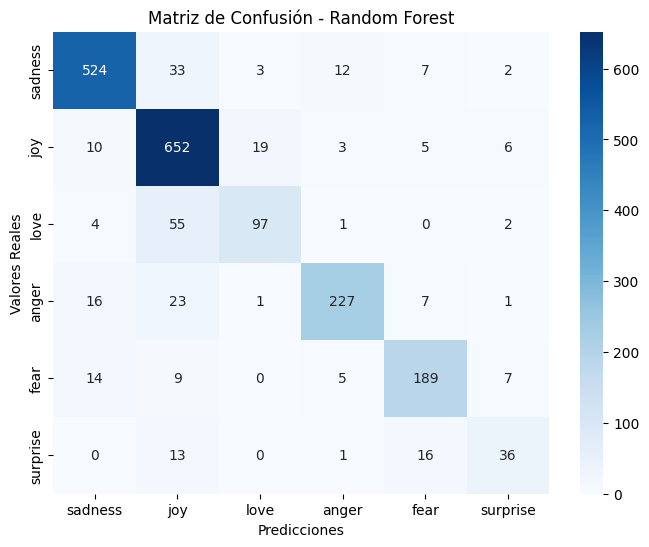

In [ ]:
# Construir los conjuntos de entrenamiento y prueba
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Vectorizar texto usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Inicializar y entrenar el clasificador Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

# Realizar predicciones
rf_predictions = rf_model.predict(X_test_vectorized)

# Evaluar el modelo
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Obtener la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


# Regresión Logística

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy en conjunto de prueba (Regresión Logística): 0.8620

Reporte de Clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       581
           1       0.83      0.96      0.89       695
           2       0.82      0.58      0.68       159
           3       0.90      0.81      0.85       275
           4       0.87      0.78      0.82       224
           5       0.84      0.47      0.60        66

    accuracy                           0.86      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.86      0.86      0.86      2000



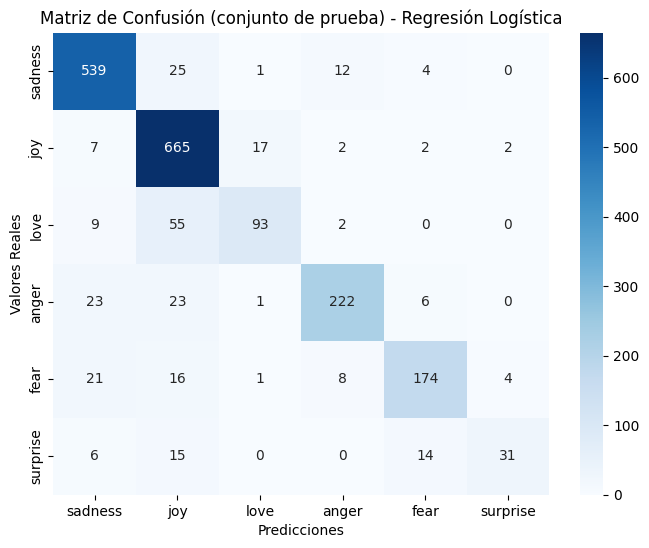

In [ ]:
# Construir los conjuntos de entrenamiento y prueba
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Vectorizar texto usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_vectors, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test_logistic = logistic_model.predict(X_test_vectors)

# Evaluar el rendimiento
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)
print(f'Accuracy en conjunto de prueba (Regresión Logística): {accuracy_test_logistic:.4f}')

# Otras métricas de evaluación
print('\nReporte de Clasificación en conjunto de prueba:')
print(classification_report(y_test, y_pred_test_logistic))

# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix_test_logistic = confusion_matrix(y_test, y_pred_test_logistic)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (conjunto de prueba) - Regresión Logística')
plt.show()